# MiniProyecto 4: Optimización de parámetros

¡Bienvenidos al cuarto (mini)proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando (por última vez) con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso es optimizar los parámetros de los algoritmos que usamos en el proyecto pasado.

El dataset es el mismo del proyecto 3. Recordemos que las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadréatico medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

## Pandas - Levantamos el dataset

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

**Separá** el dataset en entrenamiento (80%) y test (20%) utilizando como target la columna `price_aprox_usd`

In [2]:
# Esto es lo que hace
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape[0], X_test.shape[0])

5100 1276


In [3]:
df

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,-34.660,-58.449,124000.000,160.000,120.000,3,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6372,-34.663,-58.439,90000.000,77.000,60.000,3,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6373,-34.664,-58.444,115000.000,120.000,100.000,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6374,-34.664,-58.443,99000.000,115.000,82.000,3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Scikit-learn - Entrenamiento

Para repasar los parámetros de árboles de decisión en Scikit-learn: 

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

En primer lugar veamos como hacer cross validation. Para eso necesitamos definir la cantidad de **folds**, en este caso vamos a usar **5**.

GridSearchCV nos permite testear a través de un espacio de búsqueda de parámetros la mejor combinación posible dado un estimador.

Por ejemplo, en este caso probamos la profundidad máxima y la máxima cantidad de features para hacer los split. Ambos entre 1 y 5.
Recordemos que para hacer la optimización scikit-learn usa la métrica `neg_mean_squared_error` en lugar de `mean_squared_error`.

**Creá** una variable `param_grid` con valores del 1 al 5 para los atributos `max_depth` y `max_features`. 

In [4]:
param_grid = {'max_depth': [1,2,3,4,5], 'max_features': [1,2,3,4,5]}

**Importá** `GridSearchCV` y `DecisionTreeRegressor`.

**Creá** una variable `grid_search` y asignale un `GridSearchCV` que recorra el `param_grid` que creaste con el algoritmos `DecisionTreeRegressor` y el un scoring de `neg_mean_squared_error`

In [36]:
# Importa y crea un GridSearchCV en esta celda

In [5]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(reg_tree, param_grid, cv=5,
                           scoring='neg_mean_squared_error',refit=True, 
                           return_train_score=True)


A continuación, realizá el `fit` del `grid_search` con el conjunto de entrenamiento

In [7]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             

In [8]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_max_features',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [9]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params','mean_test_score','mean_train_score']].sort_values('mean_test_score',ascending=False)

,params,mean_test_score,mean_train_score
19,"{'max_depth': 4, 'max_features': 5}",-714874264.779,-701359257.761
24,"{'max_depth': 5, 'max_features': 5}",-828117572.144,-808418538.974
23,"{'max_depth': 5, 'max_features': 4}",-856155084.228,-835381567.627
18,"{'max_depth': 4, 'max_features': 4}",-866487126.784,-853072940.996
21,"{'max_depth': 5, 'max_features': 2}",-872326320.682,-853546101.322
14,"{'max_depth': 3, 'max_features': 5}",-901067317.479,-892753347.925
16,"{'max_depth': 4, 'max_features': 2}",-955087801.579,-945379057.262
13,"{'max_depth': 3, 'max_features': 4}",-956237577.944,-951098574.441
11,"{'max_depth': 3, 'max_features': 2}",-960034535.465,-952812132.262
8,"{'max_depth': 2, 'max_features': 4}",-960375784.281,-957113582.538


Revisemos los resultados. Recordemos que no están expresados en RMSE.

**Mostrá** los `grid_scores` obtenidos durante el `grid_search`

In [10]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

De esta manera, el valor con mejor resultado (dado el espacio de búsqueda definido) es `max_depth` 4 y `max_features` 5 (aunque estos valores dependen de la seed que utilice en DecisionTreeRegressor ).

**Mostrá** el mejor score y los mejores parámetros encontrados por `grid_search`

In [12]:
grid_search.best_score_

-714874264.7791498

In [15]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 5}

otra forma de buscar..

In [14]:
scores_df['mean_test_score'].idxmax()


19

In [16]:
scores_df['params'][19]

{'max_depth': 4, 'max_features': 5}

In [17]:
grid_search.scoring

'neg_mean_squared_error'

Convertimos a RMSE.

In [18]:
def nmsq2rmse(score):
    return np.round(np.sqrt(-score), 2)

In [20]:
nmsq2rmse(grid_search.best_score_)

26737.13

Aprovechando que hay sólo dos hiperparámetros podemos hacer alguna gráfica sencilla para observar alguna tendencia en la optimización de hiperparámetros

In [21]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.array(param_grid['max_depth'])
y = np.array(param_grid['max_features'])
m=0
superf=np.empty([25,3])


In [22]:
for i in x:
    for j in y:
        superf[m,0]=i
        superf[m,1]=j
        superf[m,2]=scores_df['mean_test_score'][m]
        m+=1

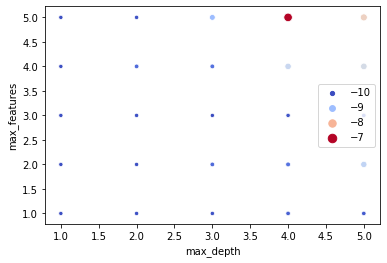

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel("max_depth")
plt.ylabel("max_features")
ax = sns.scatterplot(x=superf[:,0], y=superf[:,1],hue=superf[:,2],
                      size=superf[:,2],palette="coolwarm",legend='brief')
                     

al estar casi en los valores extremos de max_features y max_depth para los mejores scoring, sería conveniente probar con valores más altos para ver si mejora nuestro modelo

__Encontrar el mejor modelo para el espacio de búsqueda dado__

* `"min_samples_split": [2, 10, 20]`
* `"max_depth": [None, 2, 5, 10, 15]`
* `"min_samples_leaf": [1, 5, 10, 15]`
* `"max_leaf_nodes": [None, 5, 10, 20]`

Recordemos que `GridSearchCV` tiene como parámetro default `refit=True`. Esto significa que luego de hacer la corrida se ajusta el mejor modelo al conjunto de datos de entrada. De esta manera, se puede predecir directamente usando `best_estimator_`.

In [25]:
param_grid_1 = {"min_samples_split": [2, 10, 20],'max_depth': [None,2,5, 10, 15],"min_samples_leaf": [1, 5, 10, 15] ,"max_leaf_nodes": [None, 5, 10, 20]}

In [26]:
grid_search = GridSearchCV(reg_tree, param_grid_1, cv=5,
                           scoring='neg_mean_squared_error',refit=True, 
                           return_train_score=True)


In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [None, 2, 5, 10, 15],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 15],
                   

In [28]:
optimised_decision_tree = grid_search.best_estimator_

In [29]:
optimised_decision_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [30]:
grid_search.best_params_

{'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

__Evaluemos en testing el desempeño de este modelo.__

Como venimos trabajando, el resultado en testing será la medición que usaremos como benchmark para comparar este modelos con otros en el futuro, puesto que no estuvo en contacto con el dataset de test para la calibración.

In [31]:
from sklearn.metrics import mean_squared_error
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
np.round(rmse)

21301.0

Vemos los primeros 10 resultados de la predicción del valor de propiedades.

In [32]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [33]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [35]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,103438.660,23438.660
1,128000.000,135705.882,7705.882
2,150000.000,156075.759,6075.759
3,85000.000,102400.991,17400.991
4,135000.000,135571.622,571.622
5,135000.000,109560.000,25440.000
6,68000.000,75181.250,7181.250
7,110000.000,140444.444,30444.444
8,134000.000,158431.250,24431.250
9,110000.000,76701.202,33298.798


comparando con los resultados de la entrega 3 se observa como mejoró el modelo